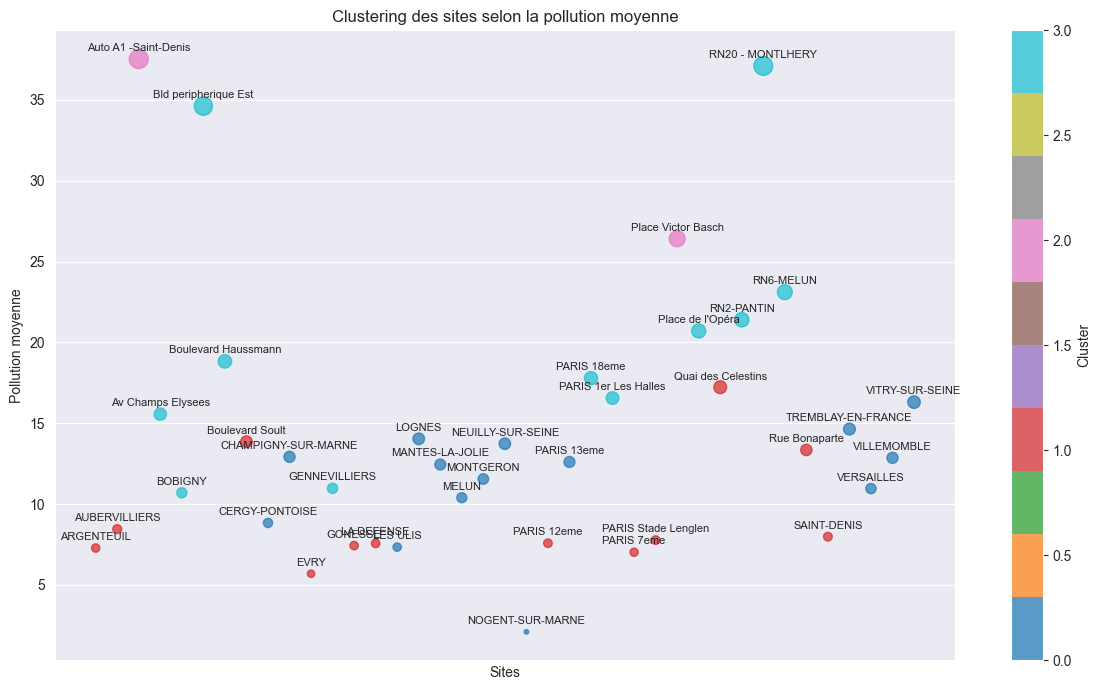


✅ Clustering terminé. Résultats sauvegardés dans data/sites_clusters.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ===============================
# 🔹 Charger les données
# ===============================
csv_path = "data/all_years_grouped_data.csv"
df = pd.read_csv(csv_path, sep=";")
df["date"] = pd.to_datetime(df["Jour"])

# ===============================
# 🔹 Préparer les données
# ===============================
pivot = df.pivot_table(
    index="nom site",
    columns="Polluant",
    values="valeur_moyenne",
    aggfunc="mean"
).fillna(0)

# Pollution globale moyenne par site
pivot["Pollution_moyenne"] = pivot.mean(axis=1)

# Standardisation pour clustering
X = pivot.drop(columns=["Pollution_moyenne"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 🔹 Clustering
# ===============================
n_clusters = 4  # ajustable
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
pivot["Cluster"] = clusters

# ===============================
# 🔹 Visualisation scatter (Pollution moyenne)
# ===============================
plt.figure(figsize=(12, 7))

# Position des points (axe X = index numérique des sites)
x_pos = np.arange(len(pivot))

scatter = plt.scatter(
    x=x_pos,
    y=pivot["Pollution_moyenne"],
    c=pivot["Cluster"],
    cmap="tab10",
    s=pivot["Pollution_moyenne"] * 5,  # taille des points = pollution
    alpha=0.7
)

# Ajouter les labels des sites
for i, site in enumerate(pivot.index):
    plt.text(x_pos[i], pivot["Pollution_moyenne"].iloc[i] + 0.5, site, fontsize=8, ha="center")

plt.title("Clustering des sites selon la pollution moyenne")
plt.xlabel("Sites")
plt.ylabel("Pollution moyenne")
plt.colorbar(scatter, label="Cluster")
plt.xticks([])  # on cache l’axe X car on met les labels directement
plt.tight_layout()
plt.show()

# ===============================
# 🔹 Export CSV
# ===============================
pivot.reset_index()[["nom site", "Pollution_moyenne", "Cluster"]].to_csv(
    "data/sites_clusters.csv", index=False
)

print("\n✅ Clustering terminé. Résultats sauvegardés dans data/sites_clusters.csv")
